In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
##  Loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


#### Examine the size , it is a good practice 

In [2]:
print('Initial shape of dimension of x_train:', str(x_train.shape))
print('Number of samples in our trainig data:', str(len(x_train)))
print('Number of labels in our trainig data:', str(len(y_train)))
print('Number of samples in our test data:', str(len(x_test)))
print('Number of labels in our test data:', str(len(y_test)))
print()

print('Dimension of x_train: ', str(x_train[0].shape))
print('Lables in x_train: ', str(y_train.shape))
print()

print('Dimension of x_test: ', str(x_test[0].shape))
print('Lables in y_test: ', str(y_test.shape))


Initial shape of dimension of x_train: (60000, 28, 28)
Number of samples in our trainig data: 60000
Number of labels in our trainig data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimension of x_train:  (28, 28)
Lables in x_train:  (60000,)

Dimension of x_test:  (28, 28)
Lables in y_test:  (10000,)


#### Looking into some random images : Using openCV

In [3]:
# Using opencv to display some random images

num = 5
for i in range(0, num):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    window_name = 'Random Sample ' + str(i)
    cv2.imshow(window_name, img)
    cv2.waitKey(0)
cv2.destroyAllWindows()   

#### Looking into some random images: Using Matplotlib

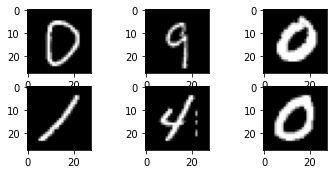

In [4]:
# Using MatplotLib
# subplot's arguments are nrows, ncols, index
plt.subplot(331)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.show()


#### Reshaping the imgae shape 

In [5]:
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# storing the input shape of an image
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 as keras needs that format
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input shape in order to train faster
x_train /=255
x_test/=255

print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### Step : One Hot Encode Our Labels

In [6]:
from keras.utils import np_utils 

# We can use the hot encoder
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Count the number of columns 
print('Number of classes: ', str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] + x_train.shape[2]

7
Number of classes:  10


In [8]:
# y_test[0]

#### Building the model:

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

# Create model
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), 
                 activation = 'relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.001),
                                                metrics = ['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

#### Training our model

1. We place our formatted data as the inputs and set the batch size, number of epochs(How many images we processed in one batch)

In [18]:
batch_size = 32
epochs = 10

history = model.fit(x_train, y_train,
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 1,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test Loss : ', score[0])
print('Test accuracy : ', score[1])


Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6417 - accuracy: 0.8002 - val_loss: 0.3384 - val_accuracy: 0.9051
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4913 - accuracy: 0.8487 - val_loss: 0.2770 - val_accuracy: 0.9190
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4250 - accuracy: 0.8703 - val_loss: 0.2424 - val_accuracy: 0.9290
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3877 - accuracy: 0.8825 - val_loss: 0.2217 - val_accuracy: 0.9362
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.3551 - accuracy: 0.8933 - val_loss: 0.2035 - val_accuracy: 0.9410
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3377 - accuracy: 0.8986 - val_loss: 0.1914 - val_accuracy: 0.9444
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3248 - accuracy: 0.9013 - val_loss: 0.1818 -

#### Plotting the loss and accuracy

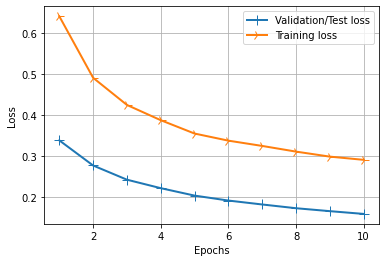

In [21]:
 # Plotting the loss charts 
history_dict = history.history ## We can get the history of that from above 

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line_1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test loss')
line_2 = plt.plot(epochs, loss_values, label = 'Training loss')
plt.setp(line_1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line_2,linewidth = 2.0, marker = '4',markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

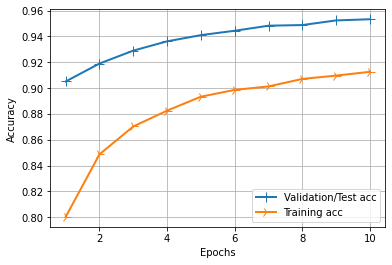

In [24]:
 # Plotting the accuracy charts 
history_dict = history.history ## We can get the history of that from above 

loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line_1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test acc')
line_2 = plt.plot(epochs, loss_values, label = 'Training acc')
plt.setp(line_1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line_2,linewidth = 2.0, marker = '4',markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

#### Saving our model

In [29]:
model.save('D:\programming\jupyter\Deep Learning\models made by me from image videos\mnist_simpleCNN_10Epochs.h5')
print('Model Saved ')

Model Saved 


#### Loading a saved model

In [30]:
from keras.models import load_model
classifier = load_model('D:\programming\jupyter\Deep Learning\models made by me from image videos\mnist_simpleCNN_10Epochs.h5')

#### Inputting some test data into classifier which is just made

In [32]:
def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_img = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT,value = BLACK)
    expanded_img = cv2.cvtColor(expanded_img, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_img, str(pred), (152, 70), cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0, 255, 0), 2)
    cv2.imshow(name, expanded_img)
    
for i in range(0, 10):
    rand = np.random.randint(0, len(x_test))
    input_im = x_test[rand]
    
    imageL = cv2.resize(input_im, None, fx = 4, fy = 4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1, 28, 28, 1)
    
    ## Get predictions
    res = str(classifier.predict_classes(input_im, 1, verbose=0)[0])
    draw_test('Prediction : ', res, imageL)
    cv2.waitKey(0)
cv2.destroyAllWindows()